In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load image
image = cv2.imread("../data/images/wynonnaearp.jpg")
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)


In [3]:
# Extract Hue channel
hue_channel = hls_image[:, :, 0]

# Compute Hue histogram
hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])

# Normalise histogram for display
hist = hist / hist.max() * 50       # 50 pixels is height of gradient

# Generate Hue Gradient
hue_scale = np.zeros((50, 180, 3), dtype=np.uint8)
for i in range(180):
    hue_scale[:, i] = [i, 255, 255]     # Hue, Max Saturation, Max Value

# Convert from HSV to RGB for correct display
hue_scale_rgb = cv2.cvtColor(hue_scale, cv2.COLOR_HSV2RGB)

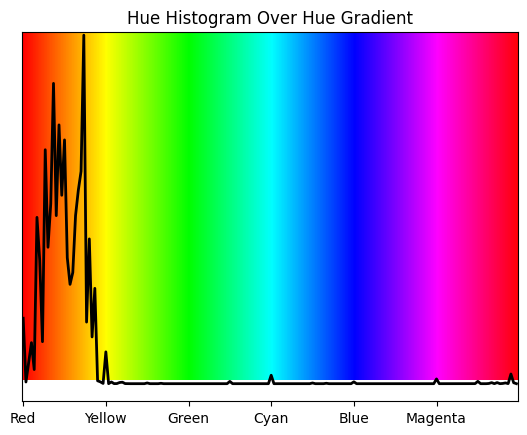

In [4]:
# Plot the hue gradient
plt.imshow(hue_scale_rgb, aspect='auto')
plt.xticks([0, 30, 60, 90, 120, 150, 180], ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'])
plt.yticks([])

# Overlay histogram as a line plot
plt.plot(range(180), 50 - hist.flatten(), color='black', linewidth=2)      # Plot in black for contrast

plt.title("Hue Histogram Over Hue Gradient")
plt.show()